In [578]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [579]:
df = pd.read_csv("spotify_song_classification-Copy1.csv")
df.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


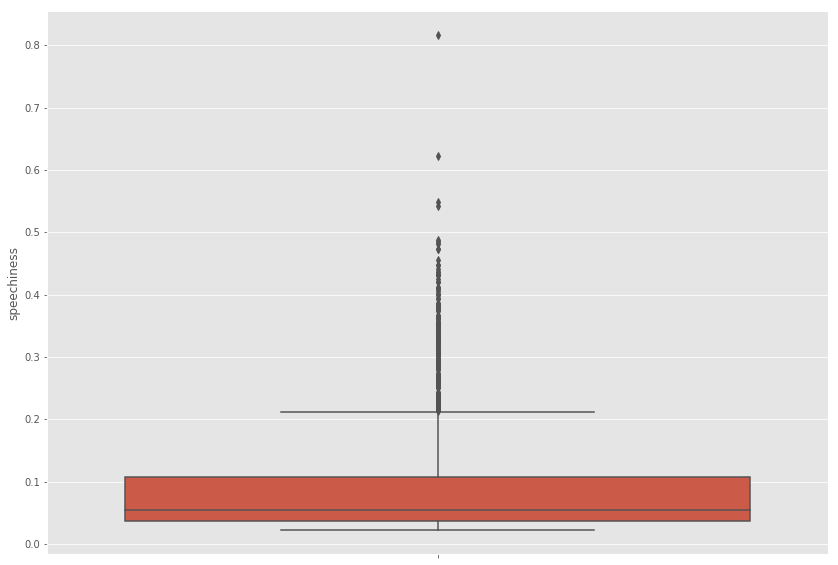

In [580]:
plt.figure(figsize = (14, 10))
sns.boxplot(y = "speechiness", data = df)

In [581]:
high_boundary = df["speechiness"].quantile(.75) + 1.5 * (df["speechiness"].quantile(.75) - df["speechiness"].quantile(.25))
outliers = df[df["speechiness"] > high_boundary].index
outliers

Int64Index([   0,    2,    8,    9,   18,   22,   26,   35,   43,   44,
            ...
            1951, 1967, 1969, 1977, 1978, 1983, 1997, 2002, 2004, 2012],
           dtype='int64', length=209)

In [582]:
outlier = df[df["speechiness"] == df["speechiness"].max()].index
df.drop(outlier, inplace = True)

In [583]:
encoder = LabelEncoder()
artist_encoded = encoder.fit_transform(df["artist"])
df["artist"] = artist_encoded

In [584]:
X = df.drop(["target", "song_title", "Unnamed: 0"], axis = 1)

In [585]:
X.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,449
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,222
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,449
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,95
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,628


In [586]:
y = df["target"]

In [587]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [588]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

In [589]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [590]:
def sigmoid(z):
    return 1 / (1 + np.e ** (-z))

def sigmoid_prime(a):
    #Derivada de sigmoid na verdade é sigmoid(a) * (1 - sigmoid(a)). Porém, estou assumindo que "a" já foi passada pela sigmoid no output da rede
    return a * (1 - a)

In [591]:
lr = .1
n_inputs = X_train.shape[1]
n_hidden = 256
n_outputs = 1

In [592]:
w1 = np.random.randn(n_hidden, n_inputs)
w2 = np.random.randn(n_outputs, n_hidden)
b1 = np.ones((n_hidden, 1))
b2 = np.ones((n_outputs, 1))

In [593]:
def forward(X, w1, w2, b1, b2):
    predictions = []
    for index in range(len(X)):
        X_i = X[index].reshape((n_inputs, 1))
        z1 = np.matmul(w1, X_i) + b1
        a1 = sigmoid(z1)
        z2 = np.matmul(w2, a1) + b2
        a2 = sigmoid(z2)
        if a2[0][0] >= .5:  
            predictions.append(1)
        elif (1 - a2[0][0]) > .5:
            predictions.append(0)
    return np.asarray(predictions)

In [594]:
def train(X, y, w1, w2, b1, b2):
    #FORWARD
    X = X.reshape((n_inputs, 1))
    y = y.reshape((n_outputs, 1))
    z1 = np.matmul(w1, X) + b1
    a1 = sigmoid(z1)
    z2 = np.matmul(w2, a1) + b2
    a2 = sigmoid(z2)
    
    #BACK
        #ERROS NAS CAMADAS E UPDATES
    output_error = a2 - y
    gradient2 = output_error * sigmoid_prime(a2) 
    update_vector_2 = np.matmul(gradient2, a1.T)
    
    hidden_error = np.matmul(w2.T, output_error) * sigmoid_prime(a2)
    gradient1 = hidden_error * sigmoid_prime(a1)
    update_vector_1 = np.matmul(gradient1, X.T)

        #AJUSTAR PARÂMETROS
    w1 -= lr * update_vector_1
    w2 -= lr * update_vector_2
    b1 -= lr * gradient1
    b2 -= lr * gradient2
    
    return output_error

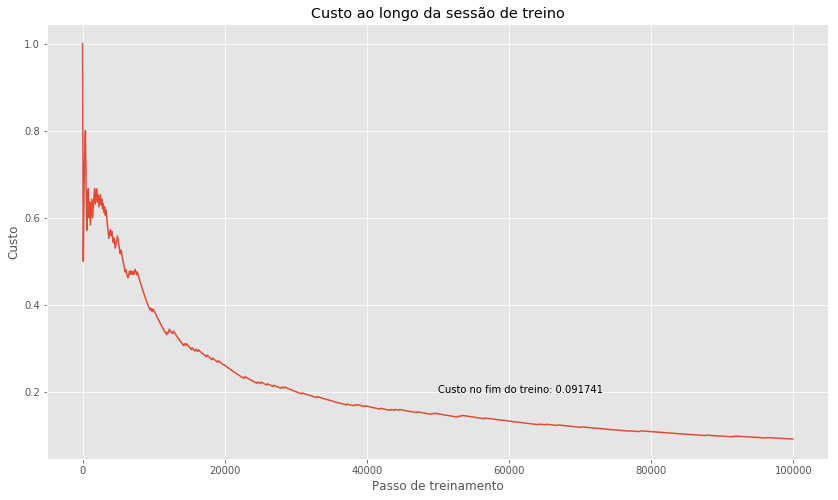

In [595]:
errors = []
cost = []
step = []
for i in range(100000):
    index = np.random.randint(len(X_train))
    train(X_train[index], y_train[index], w1, w2, b1, b2)
    
    if i % 100 == 0:
        error_this_example = train(X_train[index], y_train[index], w1, w2, b1, b2)
        errors.append(error_this_example[0][0])
        cost.append(sum(np.square(errors)) / len(errors))
        step.append(i)
plt.style.use("ggplot")
plt.figure(figsize = (14, 8))
plt.plot(step, cost)
plt.title("Custo ao longo da sessão de treino")
plt.ylabel("Custo")
plt.xlabel("Passo de treinamento")
plt.text(np.mean(step), np.mean(cost), "Custo no fim do treino: {:f}".format(cost[-1]))
plt.show()

In [596]:
predictions = forward(X_test, w1, w2, b1, b2)
print(classification_report(y_test, predictions))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, predictions)*100))

             precision    recall  f1-score   support

          0       0.71      0.62      0.66       191
          1       0.69      0.77      0.73       213

avg / total       0.70      0.70      0.70       404

Accuracy: 70.05%
